<a href="https://colab.research.google.com/github/QuaziSamiha/Learning-ML/blob/main/Final_NNFS_Lab_5_(8_May%2C_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

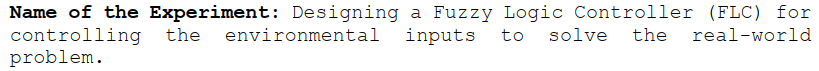

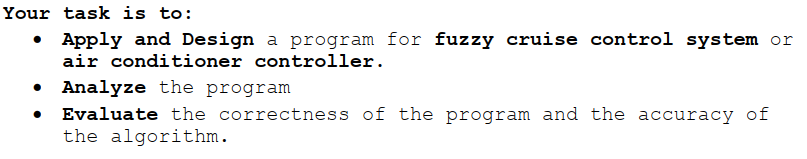

* FLC: Speed control of a vehicle
* Let two fuzzy inputs (speed difference (SD) and acceleration (A)) and one fuzzy
* output throttle control (TC) be there.

* X: Universe of discourse [0,240]
* Partitions: 
  *   NL: Open left MF (a = 30, b = 60) 
  * NM: Traingular(a = 30, b = 60, c = 90)
  * NS: Traingular(a = 60, b = 90, c = 120)
  * ZE: Traingular(a = 90, b = 120, c = 150)
  * PS: Traingular(a = 120, b = 150, c = 180)
  * PM: Traingular(a = 150, b = 180, c = 210)
  * PL: Open right (a = 180, b = 210) 
    
* Rules
* R1: if SD is NL and A is ZE then TC is PL
* R2: if SD is ZE and A is NL then TC is PL
* R3: if SD is NM and A is ZE then TC is PM
* R4: if SD is NS and A is PS then TC is PS
* R5: if SD is PS and A is NS then TC is NS
* R6: if SD is PL and A is ZE then TC is NL
* R7: if SD is ZE and A is NS then TC is PS
* R8: if SD is ZE and A is NM then TC is PM

* SD is speed difference
* AC is acceleration
* TC is throttle control
* ZE is zero
* NL is negative large
* PL is positive large
* NM is negative medium
* PM is positive medium
* NS is negative small
* PS is positive small

In [ ]:
import numpy as np

In [ ]:
# this crisp values will be used for fuzzification to get the fuzzy values of the inputs
Speed = 100 # crisp value
Acceleration = 70 # crisp value
print("The speed input is: ", Speed)
print("The Acceleration input is: ", Acceleration)
print("\n")

The speed input is:  100
The Acceleration input is:  70




# Fuzzification

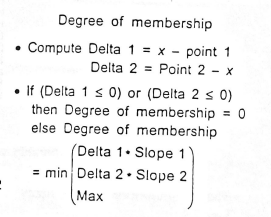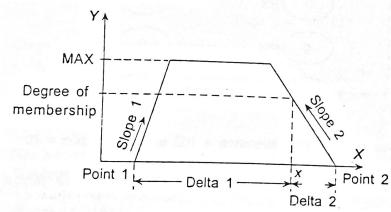

In [ ]:
max = 1

def compute_mew(x, point_1, point_2, slope_1, slope_2):
  delta_1 = x - point_1
  delta_2 = point_2 - x
  # print(x, point_1, point_2, slope_1, slope_2, delta_1, delta_2)
  
  if delta_1 <= 0 or delta_2 <= 0:
    return 0
  else:
    return min((delta_1*slope_1), (delta_2*slope_2), max)

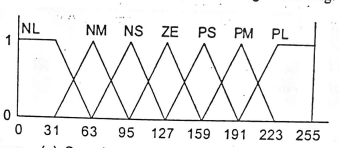

In [ ]:
#Fuzzy Partition 
def partition(x):
    NL = 0;  NM = 0; NS = 0; ZE = 0; PS = 0; PM = 0; PL = 0
    
    if x >= 0 and x <= 63:
        m = 31
        slope_1 = 0 # y axis has no defined slope
        slope_2 = abs((0-1)/(63-m)) # (31,1) and (63,0) 
        NL = compute_mew(x,0,63,slope_1,slope_2)
    if x >= 31 and x <= 95:
        m = 63
        slope_1 = abs((1-0)/(m-31)) # (31,0) and (63,1)
        slope_2 = abs((0-1)/(95-m)) # (63,1) and (95,0) 
        NM = compute_mew(x,31,95,slope_1,slope_2)
    if x >= 63 and x <= 127:
        m = 95
        slope_1 = abs((1-0)/(m-63)) # (63,0) and (95,1)
        slope_2 = abs((0-1)/(127-m)) # (95,1) and (127,0)
        NS = compute_mew(x,63,127,slope_1,slope_2)
        # print(slope_1, slope_2)
    if x >= 95 and x <= 159:
        m = 127
        slope_1 = abs((1-0)/(m-95)) # (95,0) and (127,1)
        slope_2 = abs((0-1)/(159-m)) # (127,1) and (159,0)
        ZE = compute_mew(x,95,159,slope_1,slope_2)
    if x >= 127 and x <= 191:
        m = 159
        slope_1 = abs((1-0)/(m-127)) # (127,0) and (159,1)
        slope_2 = abs((0-1)/(191-m)) # (159,1) and (191,0)
        PS = compute_mew(x,127,191,slope_1,slope_2)
    if x >= 159 and x <= 223:
        m = 191
        slope_1 = abs((1-0)/(m-159)) # (159,0) and (191,1)
        slope_2 = abs((0-1)/(223-m)) # (191,1) and (223,0)
        PM = compute_mew(x,159,223,slope_1,slope_2)
    if x >= 191 and x <= 255:
        m = 223
        slope_1 = abs((1-0)/(m-191)) # (191,0) and (223,1)
        slope_2 = 0 # (223,1) and (255,0)
        PL = compute_mew(x,191,255,slope_1,slope_2)
 
    return NL,NM,NS,ZE,PS,PM,PL;


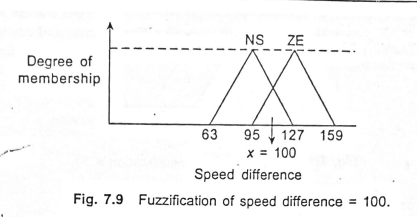

In [ ]:
# Getting fuzzy values for all the inputs for all the fuzzy sets
NLSD,NMSD,NSSD,ZESD,PSSD,PMSD,PLSD = partition(Speed)
# Display the fuzzy values for all fuzzy sets
outPut = [[NLSD,NMSD,NSSD,ZESD,PSSD,PMSD,PLSD]]
print("The fuzzy values of the crisp inputs")
print(["NL","NM","NS","ZE","PS","PM","PLSD"])
print(outPut)

The fuzzy values of the crisp inputs
['NL', 'NM', 'NS', 'ZE', 'PS', 'PM', 'PLSD']
[[0, 0, 0.84375, 0.15625, 0, 0, 0]]


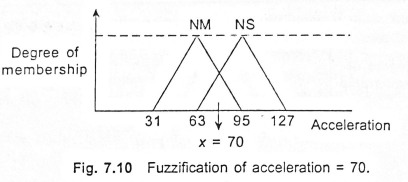

In [ ]:
# Getting fuzzy values for all the inputs for all the fuzzy sets
NLAC,NMAC,NSAC,ZEAC,PSAC,PMAC,PLAC = partition(Acceleration)
# Display the fuzzy values for all fuzzy sets
outPut = [[NLAC,NMAC,NSAC,ZEAC,PSAC,PMAC,PLAC]]
print("The fuzzy values of the crisp inputs")
print(["NL","NM","NS","ZE","PS","PM","PLSD"])
print(outPut)

The fuzzy values of the crisp inputs
['NL', 'NM', 'NS', 'ZE', 'PS', 'PM', 'PLSD']
[[0, 0.78125, 0.21875, 0, 0, 0, 0]]


In [ ]:
PLTC=0; PMTC=0; PSTC=0; NSTC=0; NLTC=0;

# fuzzy output calculation
def compare(TC1, TC2):
    TC = 0
    if TC1>TC2 and TC1 !=0 and TC2 !=0:
        TC = TC2
    else:
        TC = TC1
    
    if TC1 == 0 and TC2 !=0:
        TC = TC2
        
    if TC2 == 0 and TC1 !=0:
        TC = TC1
        
    return TC

# rules implementation 
def rule_strength_computation(NLSD,NMSD,NSSD,ZESD,PSSD,PMSD,PLSD,NLAC,NMAC,NSAC,ZEAC,PSAC,PMAC,PLAC):
  PLTC1 = min(NLSD,ZEAC) 
  PLTC2 = min(ZESD,NLAC)
  PLTC = compare(PLTC1, PLTC2)
    
  PMTC1 = min(NMSD,ZEAC)
  PMTC2 = min(ZESD,NMAC)
  PMTC = compare(PMTC1, PMTC2)
    
  PSTC1 = min(NSSD,PSAC)
  PSTC2 = min(ZESD,NSAC)
  PSTC = compare(PSTC1, PSTC2)
  NSTC = min(PSSD,NSAC)
  NLTC = min(PLSD,ZEAC)
    
  return PLTC, PMTC, PSTC, NSTC, NLTC;

In [ ]:
PLTC, PMTC, PSTC, NSTC, NLTC = rule_strength_computation(NLSD,NMSD,NSSD,ZESD,PSSD,PMSD,PLSD,NLAC,NMAC,NSAC,ZEAC,PSAC,PMAC,PLAC)
# Display the fuzzy values for all rules
output_rules = [[PLTC, PMTC, PSTC, NSTC, NLTC ]]
print("The fuzzy output: ")
print(["PLTC", "PMTC", "PSTC", "NSTC", "NLTC"])
print(output_rules)

The fuzzy output: 
['PLTC', 'PMTC', 'PSTC', 'NSTC', 'NLTC']
[[0, 0.15625, 0.15625, 0, 0]]


# Defuzzification

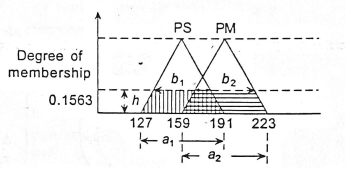

In [ ]:
# defuzzification using Centre of Gravity (CG)
CPL = 223; CPM = 191; CPS = 159; CNS = 85; CNL = 31; # centroids
areaPL=0; areaPM=0; areaPS=0; areaNS=0; areaNL=0;
def area_computation():
    global areaPL, areaPM, areaPS, areaNS, areaNL
    if PLTC!=0:
      areaPL = round((0.5 * PLTC * ((255-191)+(255-191-PLTC))), 2)
    if PMTC!=0:
      areaPM = round((0.5 * PMTC * ((223-159)+(223-159-PMTC))), 2)
    if PSTC!=0:
      areaPS = round((0.5 * PSTC * ((191-127)+(191-127-PSTC))), 2)
    if NSTC!=0:
      areaNS = round((0.5 * NSTC * ((127-63)+(127-63-NSTC))), 2)
    if NLTC!=0:
      areaNL = round((0.5 * NLTC * ((63-0)+(63-0-NLTC))), 2)
    return areaPL, areaPM, areaPS, areaNS, areaNL;

area_computation()
print('areaPL\t','areaPM\t','areaPS\t','areaNS\t','areaNL')
print(areaPL,'\t',areaPM,'\t',areaPS,'\t',areaNS,'\t',areaNL,'\t')
# area with centroid
areaWC = round(((areaPL*CPL)+(areaPM*CPM)+(areaPS*CPS)+(areaNS*CNS)+(areaNL*CNL)),2)
# calculating crisp value
CG = (areaWC/(areaPL+areaPM+areaPS+areaNS+areaNL))
print("\n\nWeighted average (CG): ", CG)

areaPL	 areaPM	 areaPS	 areaNS	 areaNL
0 	 9.99 	 9.99 	 0 	 0 	


Weighted average (CG):  175.0
